In [1]:
# R code to plot heatmap (top ten radiomics features)
library("openxlsx")
library("stringr")
library(ComplexHeatmap)
library(circlize)
library(colorspace)
library(GetoptLong)
library(ggplot2)
library(gplots)

Loading required package: grid
ComplexHeatmap version 1.18.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.4
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [2]:
library("RColorBrewer")
# install.packages('OpasnetUtils')
library(reticulate)

In [3]:
data_path = "./Data/"
output_path = "./Results/"

In [9]:
# load features, metabolic outcomes and corresponding clinical factors
xlfeatures = read.xlsx(paste(data_path , "all_major_block_features.xlsx",sep = ""), sheet = 1, colNames = TRUE)

xlfeatures = data.frame(xlfeatures)

In [8]:
colnames(xlfeatures)

[1] "ID"                                      
 [2] "GLCM_Imc2"                               
 [3] "GLRLM_RunLengthNonUniformity"            
 [4] "GLSZM_GrayLevelNonUniformity"            
 [5] "GLSZM_GrayLevelVariance"                 
 [6] "WAVELET_LLL_glcm_Idm"                    
 [7] "WAVELET_LLL_glcm_Id"                     
 [8] "WAVELET_LLH_glcm_Idm"                    
 [9] "WAVELET_LLH_glcm_Id"                     
[10] "WAVELET_LLH_glrlm_RunLengthNonUniformity"
[11] "WAVELET_HHH_glrlm_RunEntropy"            
[12] "Age"                                     
[13] "Gender"                                  
[14] "VFat"                                    
[15] "SFat"                                    
[16] "IsMS"                                    
[17] "IsCO"                                    
[18] "IsVO"                                    
[19] "IsCTVO"                                  
[20] "IsInsulinResis"

In [5]:
colnames(xlfeatures)

[1] "X1"                                      
 [2] "GLCM_Imc2"                               
 [3] "GLRLM_RunLengthNonUniformity"            
 [4] "GLSZM_GrayLevelNonUniformity"            
 [5] "GLSZM_GrayLevelVariance"                 
 [6] "WAVELET_LLL_glcm_Idm"                    
 [7] "WAVELET_LLL_glcm_Id"                     
 [8] "WAVELET_LLH_glcm_Idm"                    
 [9] "WAVELET_LLH_glcm_Id"                     
[10] "WAVELET_LLH_glrlm_RunLengthNonUniformity"
[11] "WAVELET_HHH_glrlm_RunEntropy"            
[12] "Age"                                     
[13] "Gender"                                  
[14] "VFat"                                    
[15] "SFat"                                    
[16] "IsMS"                                    
[17] "IsCO"                                    
[18] "IsVO"                                    
[19] "IsIR"                                    
[20] "IsCTVO"

In [10]:
features = xlfeatures[,2:length(colnames(xlfeatures))]

In [11]:
# fat volumes (ml), age
features$VFat <- features$VFat*1000
features$SFat <- features$SFat*1000
features$Age <- features$Age *10

In [12]:
imagefeatures = features[, 1:(length(colnames(features))-9)]
imagefeatures = scale(imagefeatures)

In [13]:
features[, 1:(length(colnames(features))-9)] = imagefeatures

In [18]:
features = features[c(colnames(features)[1:14], 'IsCTVO', 'IsIR','IsMS')]

In [20]:
colnames(features)

[1] "GLCM_Imc2"                               
 [2] "GLRLM_RunLengthNonUniformity"            
 [3] "GLSZM_GrayLevelNonUniformity"            
 [4] "GLSZM_GrayLevelVariance"                 
 [5] "WAVELET_LLL_glcm_Idm"                    
 [6] "WAVELET_LLL_glcm_Id"                     
 [7] "WAVELET_LLH_glcm_Idm"                    
 [8] "WAVELET_LLH_glcm_Id"                     
 [9] "WAVELET_LLH_glrlm_RunLengthNonUniformity"
[10] "WAVELET_HHH_glrlm_RunEntropy"            
[11] "Age"                                     
[12] "Gender"                                  
[13] "VFat"                                    
[14] "SFat"                                    
[15] "IsCTVO"                                  
[16] "IsIR"                                    
[17] "IsMS"

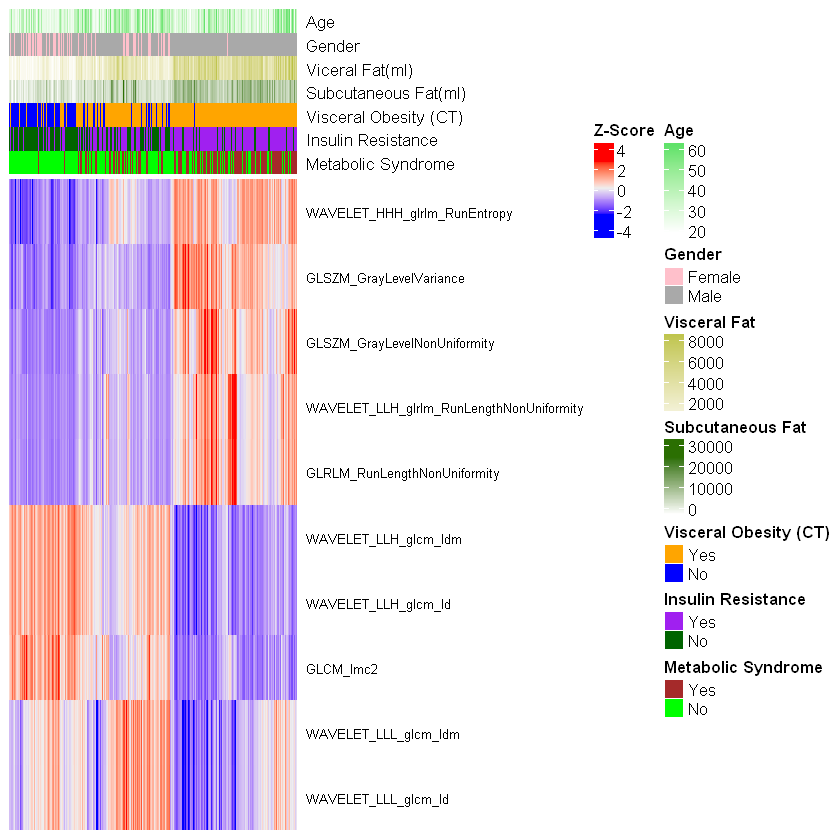

In [34]:
# plot heatmap
ha1 = HeatmapAnnotation(df = features[,11:17],
    col = list(IsCTVO = c("1"="Orange","0"="blue"), IsIR = c("1"="purple","0"="darkgreen"), IsMS = c("1"="Brown","0"="green"), Gender = c("1"= "pink", "0"= "darkgray")
    ),
                       
     annotation_legend_param = list(
               IsCTVO = list(title = "Visceral Obesity (CT)", at = c("1", "0"), labels = c("Yes", "No")),
               IsIR = list(title = "Insulin Resistance", at = c("1", "0"), labels = c("Yes", "No")),
         VFat = list(title = "Visceral Fat"),
         SFat = list(title = "Subcutaneous Fat"),
      IsMS = list(title = "Metabolic Syndrome", at = c("1", "0"), labels = c("Yes", "No")),
       Gender = list(title = "Gender", at = c("1", "0"), labels = c("Female", "Male"))
      )
   )

ht = Heatmap(t(features[,1:10]), name = "Z-Score",row_names_gp = gpar(fontsize = 8),
        show_row_dend = FALSE,show_column_dend = FALSE, cluster_rows = TRUE,
        cluster_columns = TRUE, show_row_names = TRUE, show_column_names = FALSE,clustering_distance_columns = "pearson",
        show_heatmap_legend = TRUE,
       ,top_annotation=ha1)

p = draw(ht, heatmap_legend_side = "right")

decorate_annotation("IsIR", {grid.text("Insulin Resistance", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsCTVO", {grid.text("Visceral Obesity (CT)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsMS", {grid.text("Metabolic Syndrome", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Age", {grid.text("Age", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Gender", {grid.text("Gender", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("SFat", {grid.text("Subcutaneous Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("VFat", {grid.text("Viceral Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})


In [35]:

title = paste(output_path , "inner_block_for_heatmap.tif",sep = "")
tiff(title, width=900*3, height=500*3, units="px", res=96*3, compression = "lzw")
p = draw(ht, heatmap_legend_side = "right")
decorate_annotation("IsIR", {grid.text("Insulin Resistance", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsCTVO", {grid.text("Visceral Obesity (CT)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsMS", {grid.text("Metabolic Syndrome", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Age", {grid.text("Age", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Gender", {grid.text("Gender", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("SFat", {grid.text("Subcutaneous Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("VFat", {grid.text("Viceral Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})

dev.off()





png 
  2